In [1]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from utils import load_and_process_csv

In [2]:
csv_path ="/home/vet-ai/ai_projects/skin-lesion-project/Data/exports/export_csv/export_data_24-11-07-16-53-25.csv"

In [ ]:
df_new = load_and_process_csv(csv_path)
df_new.head()

,ImageFp,label,Split,useful,blurry,not relevant,too far away
0,/home/vet-ai/ai_projects/skin-lesion-project/D...,useful,0.0,1.0,0.0,0.0,0.0
1,/home/vet-ai/ai_projects/skin-lesion-project/D...,useful,0.0,1.0,0.0,0.0,0.0
2,/home/vet-ai/ai_projects/skin-lesion-project/D...,useful,0.0,1.0,0.0,0.0,0.0
3,/home/vet-ai/ai_projects/skin-lesion-project/D...,useful,0.0,1.0,0.0,0.0,0.0
4,/home/vet-ai/ai_projects/skin-lesion-project/D...,useful,0.0,1.0,0.0,0.0,0.0


In [6]:
df_new['Split'].value_counts()

Split
0.0    42454
1.0     7799
2.0     2695
Name: count, dtype: int64

In [10]:
df_clean["label"].value_counts()

label
Skin lesion                       45702
image too blurry/ out of focus     3941
not relevant                       3079
animal too far away                 315
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

import torchvision
 
def show_batch(images, labels=None, label_map=None, n=8):



    images = images[:n]

    images = torchvision.utils.make_grid(images, nrow=n, padding=2, normalize=True).permute(1, 2, 0)

    plt.figure(figsize=(n * 2, 2))

    plt.imshow(images.cpu())

    plt.axis('off')

    plt.title("Augmented Image Batch")

    plt.show()
 
    if labels is not None and label_map:

        class_names = list(label_map.keys())

        label_indices = labels[:n].argmax(dim=1).tolist()

        print("Labels:")

        print([class_names[i] for i in label_indices])

 

/home/vet-ai/.pyenv/versions/3.12.8/lib/python3.12/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


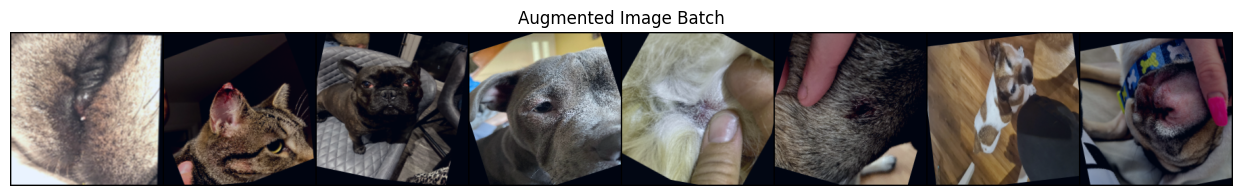

Labels:
[0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
from utils import  load_config,load_and_process_csv
from dataloaders import get_dataloaders

 
# Load config and data
config = load_config("/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/config/config.yaml")
df = load_and_process_csv(config["csv_path"])
train_loader, _ = get_dataloaders(df, config)
 
# Get label_map with reverse mapping for display
label_map = config["label_map"]
reverse_label_map = {v: k for k, v in label_map.items()}
 
# Get one batch
images, labels = next(iter(train_loader))
 
# Show
show_batch(images, labels, reverse_label_map)

In [20]:
df["Split"].value_counts()

Split
0.0    48616
1.0     8990
2.0     3099
Name: count, dtype: int64

In [ ]:
import json

# Load the JSON data from a file
with open('/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/src/model/results/quant_benchmarks.json', 'r') as file:
    data = json.load(file)


for heading, value in data.items():
    print(f"{heading}: {value}")

fp32_cpu: {'size_mb_state_dict': 17.95801544189453, 'size_mb_torchscript': 18.522934913635254}
fp32_gpu: {'size_mb_state_dict': 17.95801544189453, 'size_mb_torchscript': 18.53083324432373, 'speed': {'throughput_img_s': 2271.134831592649, 'latency_ms_per_image': 0.4403085127705708}, 'metrics': {'accuracy': 0.8163867162456725, 'balanced_accuracy': 0.7319831873914455, 'macro_f1': 0.5961632478589358, 'raw': {'epoch': 0, 'multiclass': {'accuracy': 0.8163867162456725, 'balanced_accuracy': 0.7319831873914455, 'per_class_precision': [0.9640802092414996, 0.28023598820059, 0.8206106870229007, 0.15217391304347827], 'per_class_recall': [0.825347066726377, 0.657439446366782, 0.9168443496801706, 0.5283018867924528], 'per_class_f1': [0.8893356924561686, 0.3929679420889349, 0.8660624370594159, 0.23628691983122363], 'macro_precision': 0.5542751993771171, 'macro_recall': 0.7319831873914455, 'macro_f1': 0.5961632478589358, 'weighted_precision': 0.8992539238997039, 'weighted_recall': 0.8163867162456725, '

In [ ]:
import json
import pandas as pd


def load_model_data(file_name):
    # Load the JSON file
    with open(file_name, 'r') as file:
        data = json.load(file)
    
    
    model_metrics = []

    
    for precision in ['fp32', 'fp16', 'int8_dynamic']:
        precision_data = data.get(precision, {})
        
        if precision_data:
            metrics = precision_data.get('metrics', {})
            balanced_accuracy = metrics.get('balanced_accuracy', 'N/A')
            size_mb = precision_data.get('size_mb', 'N/A')
            cpu_time_ms = precision_data.get('cpu_time_ms', 'N/A')
            cpu_fps = precision_data.get('cpu_fps', 'N/A')
            gpu_time_ms = precision_data.get('gpu_time_ms', 'N/A')
            gpu_fps = precision_data.get('gpu_fps', 'N/A')
            size_reduction = precision_data.get('size_reduction', 'N/A')
            
            model_metrics.append({
                'Precision': precision.upper(),
                'Balanced Accuracy': balanced_accuracy,
                'Model Size (MB)': size_mb,
                'CPU Time (ms)': cpu_time_ms,
                'CPU FPS': cpu_fps,
                'GPU Time (ms)': gpu_time_ms,
                'GPU FPS': gpu_fps,
                'Size Reduction': size_reduction
            })
    
    
    df = pd.DataFrame(model_metrics)
    return df




In [ ]:

file_name = '/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/post_quantization_results/efficientnet_b0_quantization_results.json'  # Change this to the path of your file
model_data_df = load_model_data(file_name)


print(model_data_df.to_string(index=False))

   Precision  Balanced Accuracy  Model Size (MB)  CPU Time (ms)   CPU FPS GPU Time (ms)     GPU FPS Size Reduction
        FP32           0.764651        18.082261      15.765040 63.431492      5.279064  189.427513            N/A
        FP16           0.744502         9.379784      15.211349 65.740391      5.726306  174.632638          48.4%
INT8_DYNAMIC           0.733160        16.273487      15.623951 64.004297           N/A         N/A          10.0%


In [ ]:


file_name = '//home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/post_quantization_results/mobilenetv3_large_quantization_results.json'  # Change this to the path of your file
model_data_df = load_model_data(file_name)


model_data_df['CPU Time (ms)'].indexes=False
print(model_data_df.to_string(index=False))

   Precision  Balanced Accuracy  Model Size (MB)  CPU Time (ms)   CPU FPS GPU Time (ms)     GPU FPS Size Reduction
        FP32           0.793588        13.428123      11.739733 85.180811       4.01561  249.028154            N/A
        FP16           0.775813         6.927601      13.047132 76.645194      4.415004  226.500348          48.4%
INT8_DYNAMIC           0.765756        12.876657      11.568768 86.439628           N/A         N/A          10.0%


In [ ]:

file_name = '//home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/post_quantization_results/mobilenetv3_small_quantization_results.json'  # Change this to the path of your file
model_data_df = load_model_data(file_name)


model_data_df

,Precision,Balanced Accuracy,Model Size (MB),CPU Time (ms),CPU FPS,GPU Time (ms),GPU FPS,Size Reduction
0,FP32,0.786797,4.803227,6.191492,161.511957,3.379073,295.93914,N/A
1,FP16,0.763524,2.581709,6.241579,160.215867,3.717008,269.033615,46.2%
2,INT8_DYNAMIC,0.754676,4.177277,6.115472,163.519668,N/A,N/A,16.3%


In [ ]:
import json
import pandas as pd
def load_model_data(file_name):
    # Load the JSON file
    with open(file_name, 'r') as file:
        data = json.load(file)
        # Extract model sizes separately
    model_sizes = data.get("model_sizes", {})


    rows = []


    for model_name in ['original_fp32', 'qat_fp32', 'quantized_int8']:
        model_data = data.get(model_name, {})
    
        row = {
        "Model Name": model_name,
        "Variant": model_data.get("epoch"),
        "Balanced Accuracy": model_data.get("multiclass", {}).get("balanced_accuracy"),
        "Macro F1": model_data.get("multiclass", {}).get("macro_f1"),
        "Binary F1": model_data.get("binary", {}).get("f1_score"),
        "Size (MB)": model_sizes.get(f"{model_name}_mb"),
        "Inference Speed (img/sec)": model_data.get("speed", {}).get("throughput_img_s")
    }
    
        rows.append(row)

# Create DataFrame
        df = pd.DataFrame(rows)

# Print DataFrame
    return df


In [ ]:

df = load_model_data('/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/src/model/qat_pipeline_results/mobilenetv3_small_qat_evaluation_results_with_size.json') 
df

  

,Model Name,Variant,Balanced Accuracy,Macro F1,Binary F1,Size (MB),Inference Speed (img/sec)
0,original_fp32,ORIGINAL,0.758797,0.607912,0.589509,4.802146,9175.303441
1,qat_fp32,QAT,0.770297,0.599241,0.580813,4.821977,8833.353446
2,quantized_int8,QUANTIZED,0.766497,0.599926,0.579136,3.973228,725.423229


In [47]:
df = load_model_data('/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/src/model/qat_pipeline_results/mobilenetv3_large_qat_evaluation_results_with_size.json')
df

,Model Name,Variant,Balanced Accuracy,Macro F1,Binary F1,Size (MB),Inference Speed (img/sec)
0,original_fp32,ORIGINAL,0.766588,0.613054,0.564628,13.422256,3527.799603
1,qat_fp32,QAT,0.780819,0.606233,0.584190,13.442086,3399.631607
2,quantized_int8,QUANTIZED,0.781062,0.608698,0.589303,12.034701,159.517111


In [48]:
df = load_model_data('/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/src/model/qat_pipeline_results/efficientnet_b0_qat_evaluation_results.json')
df

,Model Name,Variant,Balanced Accuracy,Macro F1,Binary F1,Size (MB),Inference Speed (img/sec)
0,original_fp32,ORIGINAL,0.734651,0.596316,0.565285,18.088176,2201.392168
1,qat_fp32,QAT,0.736000,0.576764,0.528992,18.096997,2037.791477
2,quantized_int8,QUANTIZED,0.736129,0.579264,0.538551,16.213401,80.501460


In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrices(json_path,model_name,color):


    with open(json_path, 'r') as f:
        data = json.load(f)

   
    model_keys = ['original_fp32', 'qat_fp32', 'quantized_int8']

    conf_matrices = []
    titles = []

    for key in model_keys:
        model_data = data.get(key, {})
        if 'multiclass' in model_data:
            cm = model_data['multiclass'].get('confusion_matrix')
            if cm:
                conf_matrices.append(cm)
                
                titles.append(model_data.get('epoch', key.upper()))

    
    class_labels = ['useful', 'blurry', 'not_relevant', 'too_far_away']
    
    fig, axes = plt.subplots(1, len(conf_matrices), figsize=(7 * len(conf_matrices), 5))
    fig.suptitle(f'{model_name}Confusion Matrices Comparison', fontsize=16)
    for i, (cm, title) in enumerate(zip(conf_matrices, titles)):
        ax = axes[i] if len(conf_matrices) > 1 else axes
        sns.heatmap(cm, annot=True, fmt='d', cmap=color, 
                    xticklabels=class_labels, yticklabels=class_labels,
                    ax=ax, cbar=i == len(conf_matrices) - 1)
        ax.set_title(title)
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()


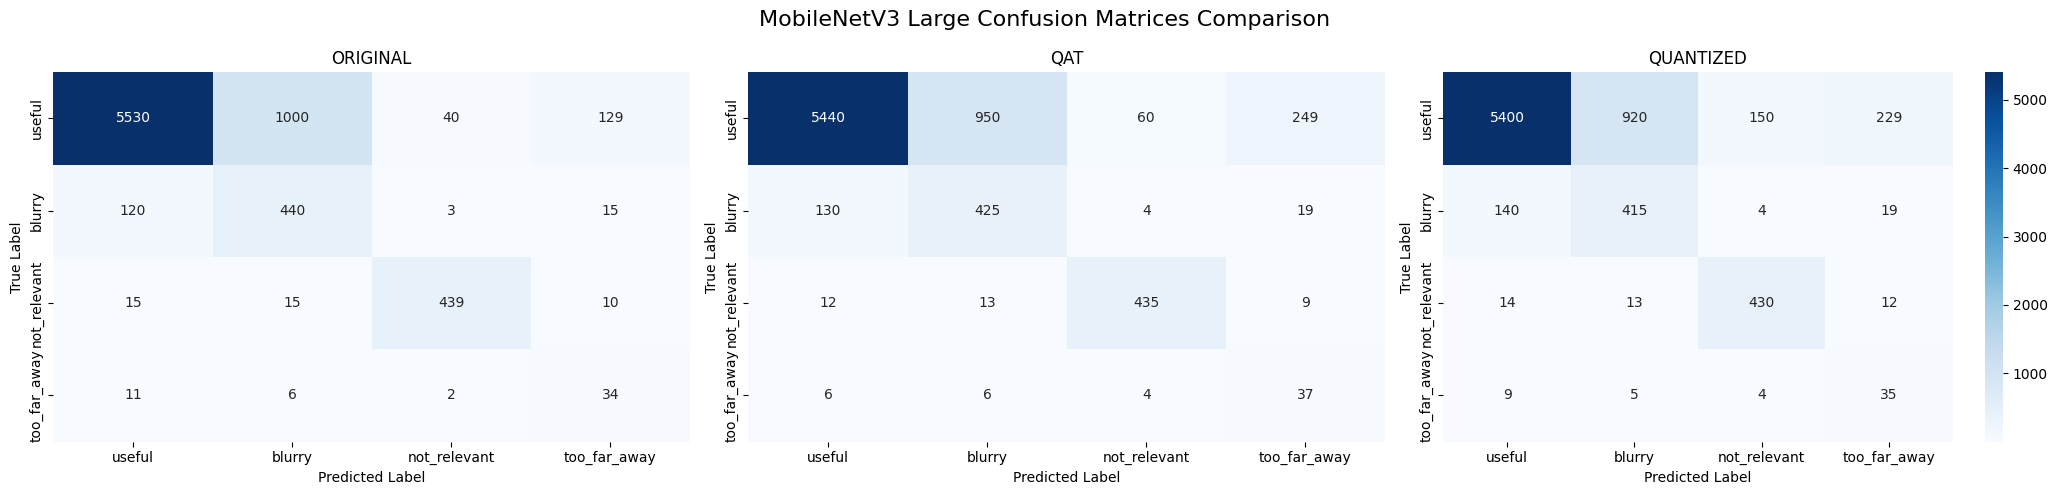

In [20]:
json_path = '/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/src/model/qat_pipeline_results/mobilenetv3_large_qat_evaluation_results.json'
plot_confusion_matrices(json_path, 'MobileNetV3 Large ')

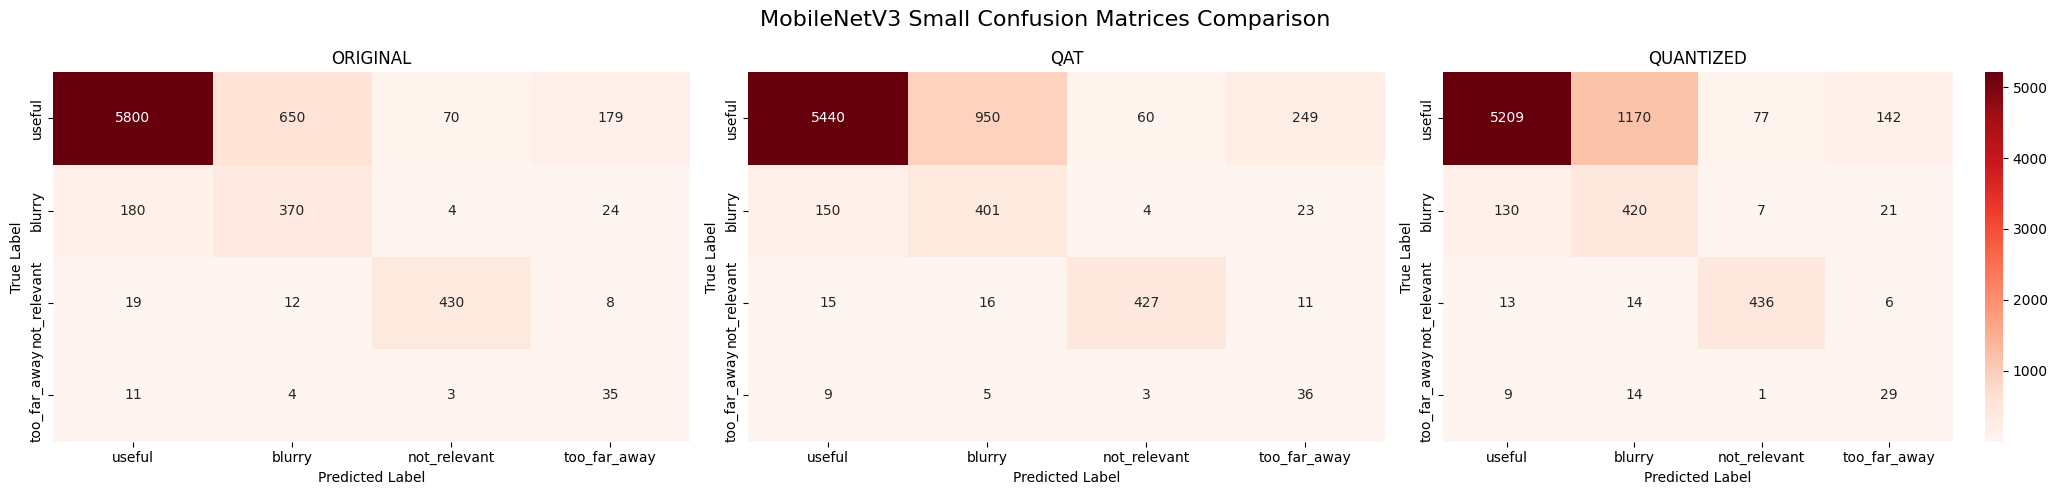

In [32]:
json_path = '/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/src/model/qat_pipeline_results/mobilenetv3_small_qat_evaluation_results.json'
plot_confusion_matrices(json_path, 'MobileNetV3 Small ','Reds')

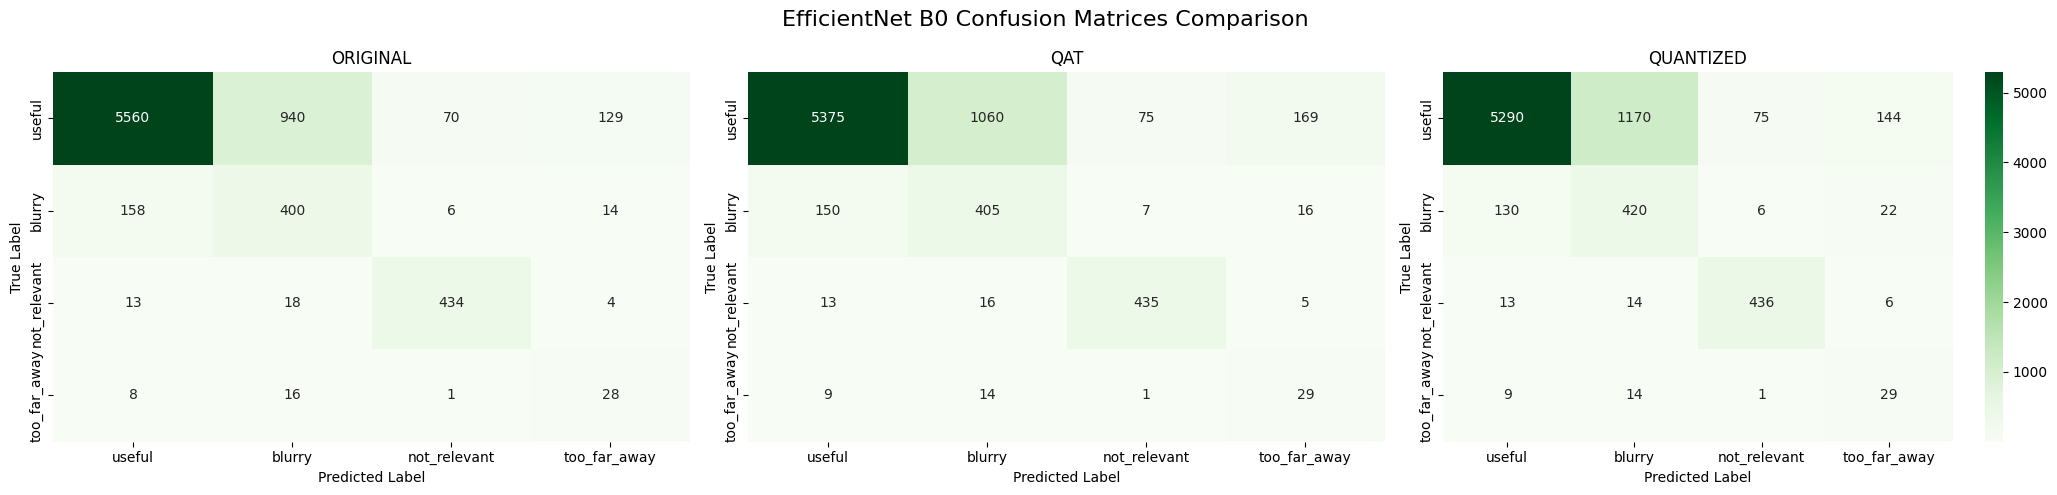

In [35]:
json_path = '/home/vet-ai/ai_projects/skin-lesion-project/venkatraj-venkatesh/skin_lesion_research/Classification/src/model/qat_pipeline_results/efficientnet_b0_qat_evaluation_results.json'
plot_confusion_matrices(json_path, 'EfficientNet B0 ','Greens')